In [3]:
#Importing essential packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv("car_data.csv")
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [40]:
#To check the statistical features of the data
data.describe()  # The statistical features are only for numeric variables

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Depreciation,Vehicle_Age
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189,2.967176,9.372093
std,2.891554,5.082812,8.644115,38886.883882,0.247915,4.828771,2.891554
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.030000,5.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000,0.390000,7.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000,1.640000,9.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000,3.350000,11.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000,57.600000,20.000000


From which manufacturing year to which manufacturing year vehicles are present in this data ?
ans:2003 to 2018
What is the lowest price to which a vehicle is sold ? 
ans:0.100000
What is the highest price to which a vehicle is sold ?
ans: 35.000000

In [7]:
#To look at the variables in detail
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


How many records are there in this data ?
ans: 301

In [8]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Are there any missing records in this data ?
ans: No

In [11]:
num_unique_vehicles = data['Car_Name'].nunique()
num_unique_vehicles

98

How many different vehicles are present in this data ?
ans:98

In [ ]:
most_sold_vehicle = data['Car_Name'].value_counts().idxmax()
most_sold_vehicle 

'city'

Which is the most sold vehicle in this data ?
ans: city

In [15]:
cng_vehicles_count = data[data['Fuel_Type'] == 'CNG'].shape[0]
cng_vehicles_count

2

Does the database include any CNG vehicle ? If yes how many of them are there ?
ans:2

In [16]:
individual_seller_count = data[data['Seller_Type'] == 'Individual'].shape[0]
individual_seller_count

106

How many vehicles here are for sell from Individuals directly ?
ans:106

In [17]:
auto_transmission_count = data[data['Transmission'] == 'Automatic'].shape[0]
auto_transmission_count

40

Does this database contain auto transmission vehicles ? If yes how many of them are there ?
ans:40

In [18]:
single_owner_count = data[data['Owner'] == 1].shape[0]
single_owner_count

10

How many single person owned vehicles are there in this database ?
ans:10

In [19]:
# Calculate depreciation for each vehicle
data['Depreciation'] = data['Present_Price'] - data['Selling_Price']

# Find the most depreciated vehicle
most_depreciated_vehicle = data.loc[data['Depreciation'].idxmax()]

# Find the least depreciated vehicle
least_depreciated_vehicle = data.loc[data['Depreciation'].idxmin()]

most_depreciated_vehicle, least_depreciated_vehicle

(Car_Name         land cruiser
 Year                     2010
 Selling_Price            35.0
 Present_Price            92.6
 Kms_Driven              78000
 Fuel_Type              Diesel
 Seller_Type            Dealer
 Transmission           Manual
 Owner                       0
 Depreciation             57.6
 Name: 86, dtype: object,
 Car_Name         Honda Activa 4G
 Year                        2017
 Selling_Price               0.48
 Present_Price               0.51
 Kms_Driven                  4300
 Fuel_Type                 Petrol
 Seller_Type           Individual
 Transmission           Automatic
 Owner                          0
 Depreciation                0.03
 Name: 155, dtype: object)

Which is the most and least cost depreciated vehicle in data ?
ans: most-land cruiser , least-Honda Activa 4G

Which brands of vehicles are less affected by cost depreciation ?

In [20]:
# Calculate average depreciation for each brand
average_depreciation_by_brand = data.groupby('Car_Name')['Depreciation'].mean().sort_values()

# Display the brands with the least average depreciation
average_depreciation_by_brand.head()

Car_Name
TVS Sport             0.040
Honda Activa 4G       0.045
Hero Passion X pro    0.050
Bajaj Avenger 150     0.050
Honda Dream Yuga      0.060
Name: Depreciation, dtype: float64

Are there any factors which you feel affect the cost depreciation ?


In [39]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Calculate correlation coefficients with Depreciation
correlation_factors = numeric_data.corr()['Depreciation'].sort_values()

# Display the correlation coefficients
correlation_factors

Year            -0.333746
Owner            0.107415
Vehicle_Age      0.333746
Kms_Driven       0.333832
Selling_Price    0.520881
Present_Price    0.864902
Depreciation     1.000000
Name: Depreciation, dtype: float64

In general selling price is affected by age of vehicle and distance driven by vehicle , is it observable from data ?

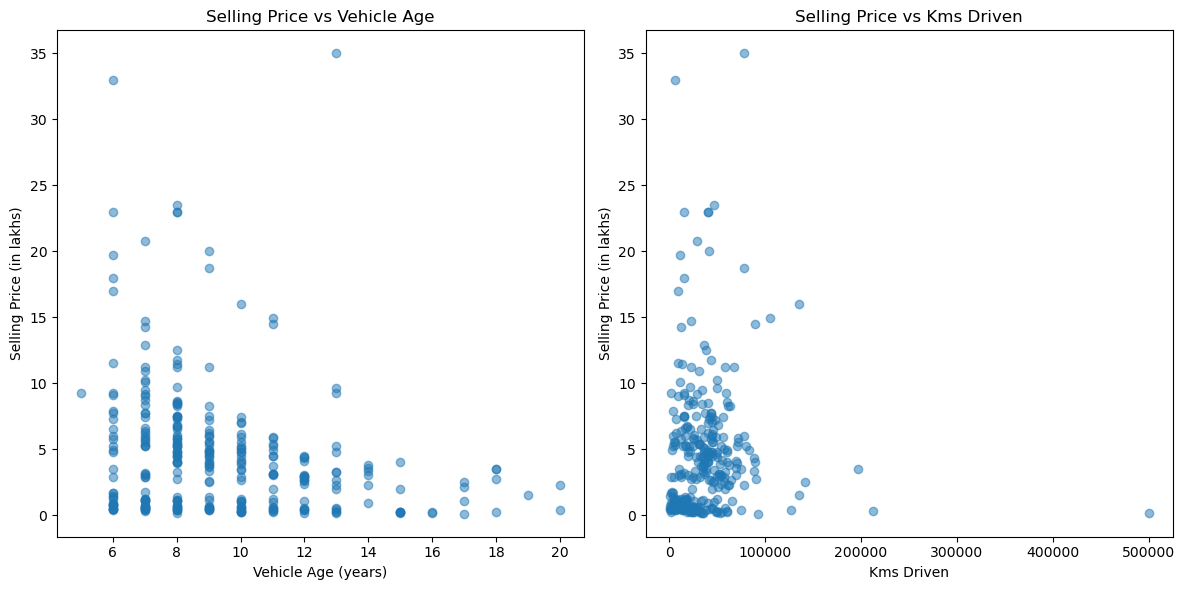

(-0.23614098016042756, 0.029187090674291236)

In [27]:
# Calculate the age of the vehicle
data['Vehicle_Age'] = 2023 - data['Year']

# Scatter plot for Selling Price vs Vehicle Age
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(data['Vehicle_Age'], data['Selling_Price'], alpha=0.5)
plt.title('Selling Price vs Vehicle Age')
plt.xlabel('Vehicle Age (years)')
plt.ylabel('Selling Price (in lakhs)')

# Scatter plot for Selling Price vs Kms Driven
plt.subplot(1, 2, 2)
plt.scatter(data['Kms_Driven'], data['Selling_Price'], alpha=0.5)
plt.title('Selling Price vs Kms Driven')
plt.xlabel('Kms Driven')
plt.ylabel('Selling Price (in lakhs)')

plt.tight_layout()
plt.show()

# Calculate correlation coefficients
correlation_age = data['Vehicle_Age'].corr(data['Selling_Price'])
correlation_kms = data['Kms_Driven'].corr(data['Selling_Price'])

correlation_age, correlation_kms

Can we get idea about newest vehicles i.e. after 2014 manufactured ?

In [28]:
# Filter the dataset for vehicles manufactured after 2014
newest_vehicles = data[data['Year'] > 2014]

# Display the filtered dataset
newest_vehicles

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Depreciation,Vehicle_Age
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2.60,6
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0,0.58,5
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0,1.37,8
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0,2.11,8
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0,0.14,7
...,...,...,...,...,...,...,...,...,...,...,...
295,city,2015,8.55,13.09,60076,Diesel,Dealer,Manual,0,4.54,8
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2.10,7
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,1.90,8
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,1.00,6


Can we find out data of only two wheelers from this data ?

In [29]:
# List of known two wheelers
two_wheelers = ['TVS Sport', 'Honda Activa 4G', 'Hero Passion X pro', 'Bajaj Avenger 150', 'Honda Dream Yuga']

# Filter the dataset for two wheelers
two_wheelers_data = data[data['Car_Name'].isin(two_wheelers)]

# Display the filtered dataset
two_wheelers_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Depreciation,Vehicle_Age
127,Bajaj Avenger 150,2016,0.75,0.80,7000,Petrol,Individual,Manual,0,0.05,7
151,Hero Passion X pro,2016,0.50,0.55,31000,Petrol,Individual,Manual,0,0.05,7
155,Honda Activa 4G,2017,0.48,0.51,4300,Petrol,Individual,Automatic,0,0.03,6
159,Honda Activa 4G,2017,0.45,0.51,4000,Petrol,Individual,Automatic,0,0.06,6


Which is the oldest bike sold here?

In [30]:
oldest_bike = two_wheelers_data.loc[two_wheelers_data['Year'].idxmin()]
oldest_bike

Car_Name         Bajaj Avenger 150
Year                          2016
Selling_Price                 0.75
Present_Price                  0.8
Kms_Driven                    7000
Fuel_Type                   Petrol
Seller_Type             Individual
Transmission                Manual
Owner                            0
Depreciation                  0.05
Vehicle_Age                      7
Name: 127, dtype: object

Which is the newest bike sold here?

In [31]:
newest_bike = two_wheelers_data.loc[two_wheelers_data['Year'].idxmax()]
newest_bike

Car_Name         Honda Activa 4G
Year                        2017
Selling_Price               0.48
Present_Price               0.51
Kms_Driven                  4300
Fuel_Type                 Petrol
Seller_Type           Individual
Transmission           Automatic
Owner                          0
Depreciation                0.03
Vehicle_Age                    6
Name: 155, dtype: object

Which is the most sold bike here?

In [32]:
most_sold_bike = two_wheelers_data['Car_Name'].value_counts().idxmax()
most_sold_bike

'Honda Activa 4G'

Do you find any deal in two wheelers which exceeded the general expectation ? Can you find reason for it ?

In [41]:
# Calculate the ratio of Selling Price to Present Price for two wheelers
two_wheelers_data['Price_Ratio'] = two_wheelers_data['Selling_Price'] / two_wheelers_data['Present_Price']

# Find the two-wheeler with the highest Price Ratio
best_deal = two_wheelers_data.loc[two_wheelers_data['Price_Ratio'].idxmax()]

# Display the best deal
best_deal

C:\Users\IFC-32\AppData\Local\Temp\ipykernel_13428\2573835477.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  two_wheelers_data['Price_Ratio'] = two_wheelers_data['Selling_Price'] / two_wheelers_data['Present_Price']


Car_Name         Honda Activa 4G
Year                        2017
Selling_Price               0.48
Present_Price               0.51
Kms_Driven                  4300
Fuel_Type                 Petrol
Seller_Type           Individual
Transmission           Automatic
Owner                          0
Depreciation                0.03
Vehicle_Age                    6
Price_Ratio             0.941176
Name: 155, dtype: object

Can we find out data of only cars from this data ?

In [34]:
# Filter the dataset for cars by excluding the known two-wheelers
cars_data = data[~data['Car_Name'].isin(two_wheelers)]

# Display the filtered dataset
cars_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Depreciation,Vehicle_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2.24,9
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,4.79,10
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2.60,6
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,1.30,12
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2.27,9
...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2.10,7
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,1.90,8
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,7.65,14
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,1.00,6


Which is the oldest car sold here?

In [35]:
oldest_car = cars_data.loc[cars_data['Year'].idxmin()]
oldest_car

Car_Name                800
Year                   2003
Selling_Price          0.35
Present_Price          2.28
Kms_Driven           127000
Fuel_Type            Petrol
Seller_Type      Individual
Transmission         Manual
Owner                     0
Depreciation           1.93
Vehicle_Age              20
Name: 37, dtype: object

Which is the newest car sold here?

In [36]:
newest_car = cars_data.loc[cars_data['Year'].idxmax()]
newest_car

Car_Name         vitara brezza
Year                      2018
Selling_Price             9.25
Present_Price             9.83
Kms_Driven                2071
Fuel_Type               Diesel
Seller_Type             Dealer
Transmission            Manual
Owner                        0
Depreciation              0.58
Vehicle_Age                  5
Name: 5, dtype: object

Do you find any deal in cars which exceeded the general expectation ? Can you find reason for it ?

In [37]:
# Calculate the ratio of Selling Price to Present Price for cars
cars_data['Price_Ratio'] = cars_data['Selling_Price'] / cars_data['Present_Price']

# Find the car with the highest Price Ratio
best_car_deal = cars_data.loc[cars_data['Price_Ratio'].idxmax()]

# Display the best car deal
best_car_deal

C:\Users\IFC-32\AppData\Local\Temp\ipykernel_13428\3682786237.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_data['Price_Ratio'] = cars_data['Selling_Price'] / cars_data['Present_Price']


Car_Name         corolla altis
Year                      2016
Selling_Price            14.73
Present_Price            14.89
Kms_Driven               23000
Fuel_Type               Diesel
Seller_Type             Dealer
Transmission            Manual
Owner                        0
Depreciation              0.16
Vehicle_Age                  7
Price_Ratio           0.989255
Name: 80, dtype: object